In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras import *
from keras.layers.normalization import BatchNormalization


InputData = np.load("InputData.npy")
InputData = np.reshape(InputData,(-1,224,224,3))

OutputData = np.array([ [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                      [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                      [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
                      

splitData = InputData[1:41]
splitData = np.append(splitData,InputData[43:58])
splitData = splitData.reshape(-1,224,224,3)
splitOutput = np.array([ [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                         [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                        [1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1] ])

model = Sequential()


model.add(Conv2D(50,11,strides=(4,4),input_shape=(224,224,3)))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(Conv2D(50,3))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(MaxPooling2D((5,5)))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(Conv2D(50,2))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(50,2))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=0.00001),metrics=['accuracy'])
model.summary()
print(splitData.shape)
history = model.fit(InputData/255,OutputData,batch_size=1,epochs=30,validation_data=(splitData,splitOutput))



model.save("KerasApplication.model")




Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 50)        18200     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 50)        10050     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 50)        10050     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 50)        10050     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 50)        10050     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 50)       

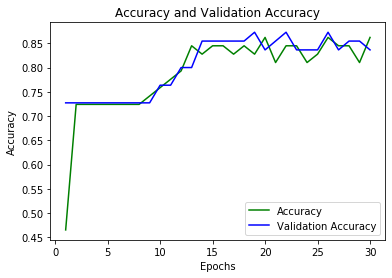

In [19]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#import matplotlib.pyplot as plt
#loss_train = history.history['loss']
#loss_val = history.history['val_loss']
#epochs = range(1,31)
#plt.plot(epochs, loss_train, 'g', label='Loss')
#plt.plot(epochs, loss_val, 'b', label='Validation loss')
#plt.title('Loss and Validation Loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()


SyntaxError: invalid syntax (<ipython-input-21-721d497746dc>, line 13)